# Example with high-resolution CMIP6 models (~100 km) using Pangeo catalog 

### Time period

We will use data from 1985 to 2014.

### Variables 

| shortname     |             Long name                   |      Units    |  levels |
| ------------- |:---------------------------------------:| -------------:|--------:|
|  prsn         |    Snowfall Flux                        | [kg m-2 s-1]  | surface |
| clw           |    Mass Fraction of Cloud Liquid Water  |  [kg kg-1]    |    ml   |
| cli           |    Mass Fraction of Cloud Ice           | [kg kg-1]     |    ml   |
| tas           |    Near-Surface Air Temperature         |   [K]         | surface |
| ta            |    Air Temperature                      |  [K]          |    ml   |
| clivi         |    Ice Water Path                       | [kg m-2]      |         |
| lwp           |    Liquid Water Path                    | [kg m-2]      |         |
| pr            |    Precipitation                        | [kg m-2 s-1]  | surface |


## Import python packages

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
import sys
sys.path.append('/uio/kant/geo-metos-u1/franzihe/Documents/Python/globalsnow/eosc-nordic-climate-demonstrator/work/utils')
from imports import (xr, intake, cftime,  xe, glob, np, cm, pd, fct,ccrs, cy, plt,)

xr.set_options(display_style="html")

# %matplotlib inline


# reload imports
%load_ext autoreload
%autoreload 2

### Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

### Search correspnding data

In [3]:
list_models = [
    'NorESM2-MM',
    'TaiESM1',
    'EC-Earth3-AerChem',
    'GFDL-ESM4',
    'SAM0-UNICON',
    'CAMS-CSM1-0',
    'CMCC-CM2-HR4',
    'MPI-ESM1-2-HR',
    'BCC-CSM2-MR',
    'E3SM-1-1',
    'CMCC-CM2-SR5',
    'CMCC-ESM2',
    'FGOALS-f3-L',
    'E3SM-1-1-ECA',
    'CIESM',
    'GFDL-CM4',
    'MRI-ESM2-0']  

In [4]:
variable_id=[
            #  'prsn', 
            #  'clivi',
            # 'lwp',
            # 'tas',
            'pr',
            # 'clw'

             ]
cat = col.search(source_id=list_models, table_id = ['Amon', 'AERmon'], experiment_id=['historical'], variable_id=variable_id[0], member_id=['r1i1p1f1'])
cat.df

activity_id       institution_id          source_id experiment_id  \
0         CMIP            NOAA-GFDL           GFDL-CM4    historical   
1         CMIP                  BCC        BCC-CSM2-MR    historical   
2         CMIP                  MRI         MRI-ESM2-0    historical   
3         CMIP                  SNU        SAM0-UNICON    historical   
4         CMIP                 CAMS        CAMS-CSM1-0    historical   
5         CMIP                MPI-M      MPI-ESM1-2-HR    historical   
6         CMIP            NOAA-GFDL          GFDL-ESM4    historical   
7         CMIP                  CAS        FGOALS-f3-L    historical   
8         CMIP                  NCC         NorESM2-MM    historical   
9         CMIP         E3SM-Project           E3SM-1-1    historical   
10        CMIP                 CMCC       CMCC-CM2-SR5    historical   
11        CMIP         E3SM-Project       E3SM-1-1-ECA    historical   
12        CMIP              AS-RCEC            TaiESM1    historical   
13        CMIP  EC-Earth-Consortium  EC-Earth3-AerChem    historical   
14        CMIP                 CMCC       CMCC-CM2-HR4    historical   
15        CMIP                 CMCC          CMCC-ESM2    historical   

   member_id table_id variable_id grid_label  \
0   r1i1p1f1     Amon          pr        gr1   
1   r1i1p1f1     Amon          pr         gn   
2   r1i1p1f1     Amon          pr         gn   
3   r1i1p1f1     Amon          pr         gn   
4   r1i1p1f1     Amon          pr         gn   
5   r1i1p1f1     Amon          pr         gn   
6   r1i1p1f1     Amon          pr        gr1   
7   r1i1p1f1     Amon          pr         gr   
8   r1i1p1f1     Amon          pr         gn   
9   r1i1p1f1     Amon          pr         gr   
10  r1i1p1f1     Amon          pr         gn   
11  r1i1p1f1     Amon          pr         gr   
12  r1i1p1f1     Amon          pr         gn   
13  r1i1p1f1     Amon          pr         gr   
14  r1i1p1f1     Amon          pr         gn   
15  r1i1p1f1     Amon          pr         gn   

                                               zstore  dcpp_init_year  \
0   gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...             NaN   
1   gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...             NaN   
2   gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...             NaN   
3   gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...             NaN   
4   gs://cmip6/CMIP6/CMIP/CAMS/CAMS-CSM1-0/histori...             NaN   
5   gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/hist...             NaN   
6   gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...             NaN   
7   gs://cmip6/CMIP6/CMIP/CAS/FGOALS-f3-L/historic...             NaN   
8   gs://cmip6/CMIP6/CMIP/NCC/NorESM2-MM/historica...             NaN   
9   gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-1/hi...             NaN   
10  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...             NaN   
11  gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-1-EC...             NaN   
12  gs://cmip6/CMIP6/CMIP/AS-RCEC/TaiESM1/historic...             NaN   
13  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
14  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/histor...             NaN   
15  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-ESM2/historica...             NaN   

     version  
0   20180701  
1   20181126  
2   20190222  
3   20190323  
4   20190708  
5   20190710  
6   20190726  
7   20190927  
8   20191108  
9   20191211  
10  20200616  
11  20200623  
12  20200623  
13  20200624  
14  20200904  
15  20210114

In [5]:
cat.df['source_id'].unique()

array(['GFDL-CM4', 'BCC-CSM2-MR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'CAMS-CSM1-0', 'MPI-ESM1-2-HR', 'GFDL-ESM4', 'FGOALS-f3-L',
       'NorESM2-MM', 'E3SM-1-1', 'CMCC-CM2-SR5', 'E3SM-1-1-ECA',
       'TaiESM1', 'EC-Earth3-AerChem', 'CMCC-CM2-HR4', 'CMCC-ESM2'],
      dtype=object)

### Create dictionary from the list of datasets we found

- This step may take several minutes so be patient!

In [6]:
# pass rename_cmip6 to consistently label coordinates
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True,}, )#preprocess=rename_cmip6)#'use_cftime':True})'decode_times':False


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
list(dset_dict.keys())

['CMIP.AS-RCEC.TaiESM1.historical.Amon.gn',
 'CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Amon.gr',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.CMCC.CMCC-ESM2.historical.Amon.gn',
 'CMIP.SNU.SAM0-UNICON.historical.Amon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.Amon.gr',
 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1',
 'CMIP.E3SM-Project.E3SM-1-1-ECA.historical.Amon.gr',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn']

In [8]:
# show coordinates
for k, ds in dset_dict.items():
    print(k)
    print(list(ds.dims))

CMIP.AS-RCEC.TaiESM1.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.NCC.NorESM2-MM.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.CAS.FGOALS-f3-L.historical.Amon.gr
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.CMCC.CMCC-ESM2.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.SNU.SAM0-UNICON.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.Amon.gr
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn
['lat', 'bnds', 'lon', 'member_id', 'time']
CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1
['bnds', 'lat', 'lon', 'member_id', 'time']
CMIP.E3SM-Project.E3SM-1-1-ECA.historica

Double check the time axis. Are they having the same calendar?

In [9]:
# metadata of the historical run:
_d2 = pd.Series(["calendar",
                 "branch_time_in_parent", #"parent_activity_id", "parent_experiment_id",	"parent_mip_era",
                 "parent_source_id",#"parent_sub_experiment_id", 
                 "parent_time_units",# "parent_variant_label"
                  ])
for i in dset_dict.keys():
    _data = []
    _names =[]
    _data.append(dset_dict[i].time.to_index().calendar)
    for k, v in dset_dict[i].attrs.items():
        
        if 'parent_time_units' in k or 'branch_time_in_parent' in k or 'parent_source_id' in k:
            _data.append(v)
            _names.append(k)
    _d2 = pd.concat([_d2,   pd.Series(_data)], axis=1)
    _d2.rename(columns={1:i.split('.')[2]}, inplace=True)
    _d2.rename(columns={0:i.split('.')[2]}, inplace=True)

_d2.dropna(how='all', axis=1, inplace=True)
_d2

TaiESM1                TaiESM1             NorESM2-MM  \
0               calendar                 noleap                 noleap   
1  branch_time_in_parent               171550.0               438000.0   
2       parent_source_id                TaiESM1             NorESM2-MM   
3      parent_time_units  days since 1850-01-01  days since 0001-01-01   

                E3SM-1-1           CMCC-CM2-SR5            FGOALS-f3-L  \
0                 noleap                 noleap                 noleap   
1                    0.0                    0.0                12345.0   
2               E3SM-1-1           CMCC-CM2-SR5            FGOALS-f3-L   
3  days since 0001-01-01  days since 1850-01-01  days since 0001-01-01   

             BCC-CSM2-MR              CMCC-ESM2            SAM0-UNICON  \
0                 noleap                 noleap                 noleap   
1                 2289.0                    0.0                99645.0   
2            BCC-CSM2-MR              CMCC-ESM2            SAM0-UNICON   
3  days since 1850-01-01  days since 1850-01-01  days since 0001-01-01   

       EC-Earth3-AerChem                 MPI-ESM1-2-HR             GFDL-CM4  \
0    proleptic_gregorian           proleptic_gregorian               noleap   
1                    0.0                           0.0              36500.0   
2      EC-Earth3-AerChem                 MPI-ESM1-2-HR             GFDL-CM4   
3  days since 1850-01-01  days since 1850-1-1 00:00:00  days since 0001-1-1   

            E3SM-1-1-ECA             MRI-ESM2-0            CAMS-CSM1-0  \
0                 noleap    proleptic_gregorian                 noleap   
1                    0.0                    0.0                 3025.0   
2           E3SM-1-1-ECA             MRI-ESM2-0            CAMS-CSM1-0   
3  days since 0001-01-01  days since 1850-01-01  days since 1850-01-01   

             GFDL-ESM4           CMCC-CM2-HR4  
0               noleap                 noleap  
1              36500.0                    0.0  
2            GFDL-ESM4           CMCC-CM2-HR4  
3  days since 0001-1-1  days since 1850-01-01

### Use data as xarray to make a simple plot

In [10]:
if variable_id[0] == 'lwp':
    ds = dset_dict['CMIP.NCC.NorESM2-MM.historical.AERmon.gn']
else:
    ds = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn']
ds

<xarray.Dataset>
Dimensions:    (lat: 192, bnds: 2, lon: 288, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 290, 192, 288), meta=np.ndarray>
Attributes: (12/54)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   Hybrid-restart from year 1200-01-01 of p...
    branch_time:                     0.0
    branch_time_in_child:            0.0
    ...                              ...
    variable_id:                     pr
    variant_label:                   r1i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/240f3d7a-faa9-4e7a-aeab-7a8...
    version_id:                      v20191108
    intake_esm_varname:              ['pr']
    intake_esm_dataset_key:          CMIP.NCC.NorESM2-MM.historical.Amon.gn

In [11]:
ds[variable_id[0]].attrs

{'_ChunkSizes': [1, 192, 288],
 'cell_measures': 'area: areacella',
 'cell_methods': 'area: time: mean',
 'comment': 'includes both liquid and solid phases',
 'history': "2019-11-25T21:53:29Z altered by CMOR: Converted type from 'd' to 'f'.",
 'long_name': 'Precipitation',
 'original_name': 'PRECT',
 'standard_name': 'precipitation_flux',
 'units': 'kg m-2 s-1'}

In [12]:
_month = ds[variable_id[0]].groupby('time.month').mean('time', keep_attrs = True)
_jan  = _month.sel(month = 1)

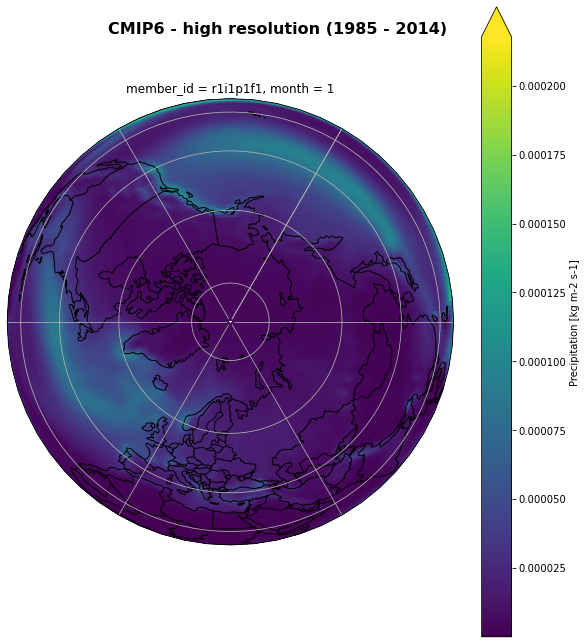

In [13]:
fig, ax = plt.subplots(1,1, 
                         figsize=[10,10], 
                         subplot_kw={'projection':ccrs.Orthographic(30, 90)})
fig.suptitle('CMIP6 - high resolution (1985 - 2014)', fontsize=16, fontweight="bold")

# Plot cosmetics 
ax.coastlines()
gl = ax.gridlines()
ax.add_feature(cy.feature.BORDERS);
gl.top_labels = False

im = _month.sel(month = 1).plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar = True,extend = 'max')



plt.tight_layout()
fig.subplots_adjust(top=1)

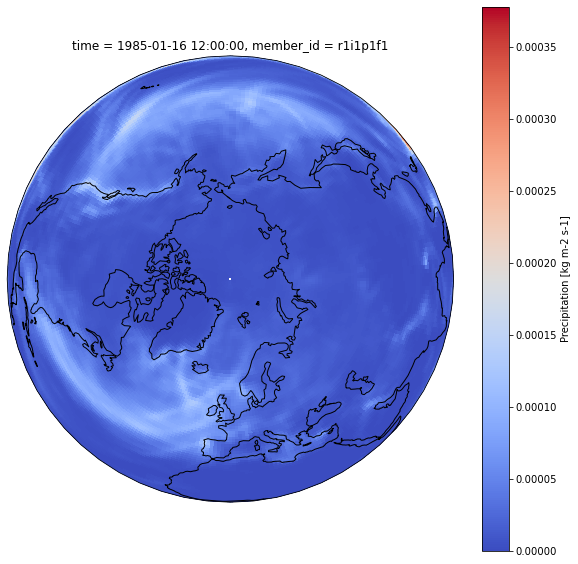

In [14]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ds[variable_id[0]].sel(time=cftime.DatetimeNoLeap(1985, 1, 16, 12, 0, 0, 0)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

### Get attributes (unique identifier)

In [15]:
ds.attrs['tracking_id']

'hdl:21.14100/240f3d7a-faa9-4e7a-aeab-7a842635dcc3'

# Regrid CMIP6 data to common NorESM2-MM grid

In [16]:
starty = 1985; endy = 2014
year_range = range(starty, endy+1)

# create dictionary for reggridded data
ds_gridded_dict = dict()

# Read in the output grid from NorESM
if variable_id[0] == 'lwp':
    ds_out = dset_dict['CMIP.NCC.NorESM2-MM.historical.AERmon.gn'].isel(member_id = 0)
else:
    ds_out = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn'].isel(member_id = 0)
ds_out = ds_out.sel(time = ds_out.time.dt.year.isin(year_range)).squeeze()

counter = 0




for keys in dset_dict.keys():
    # select only models which have atmospheric monthly values
    amon = keys.split('.')[-2]
    if amon == 'Amon' or amon == 'AERmon': 
        # select model name 
        model = keys.split('.')[2]
        
        # select where data should be saved
        filename = '{}_Amon_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
        savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/{}/'.format(model)
        nc_out = savepath + filename
        files = glob(nc_out)
        
        
            
        # Input data from CMIP6 model to be regridded
        ds_in = dset_dict[keys].isel(member_id = 0)
        ds_in = ds_in.sel(time = ds_in.time.dt.year.isin(year_range)).squeeze()
            
        # common time grid
        ds_in['time'] = ds_out['time']
            
            
            
        # Regrid data
        ds_in_regrid = fct.regrid_data(ds_in, ds_out)
          
        # Shift the longitude from 0-->360 to -180-->180 and sort by longitude and time
        ds_in_regrid = ds_in_regrid.assign_coords(lon=(((ds_in_regrid.lon + 180) % 360) - 180)).sortby('lon').sortby('time')
        ds_in_regrid = ds_in_regrid.reset_coords(names=['time_bnds', ], drop=True)
            

            
        # create dataset with all models
        ds_gridded_dict[model] = ds_in_regrid
        # ds_in_regrid.close(); ds_in.close(); ds_out.close()

        if nc_out in files:
            print('{} is downloaded'.format(nc_out))
            counter += 1
            print('Have regridded in total: {:} files'.format(str(counter)))
        else:    
            # Save to netcdf file
            ds_in_regrid.to_netcdf(nc_out)
            print('file written: {}'.format(nc_out))

Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.
pr True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/TaiESM1/pr_Amon_1deg_198501_201412.nc
Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.
pr True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/NorESM2-MM/pr_Amon_1deg_198501_201412.nc
Create weight file: bilinear_180x360_192x288.nc
Remove file bilinear_180x360_192x288.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.
pr True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/E3SM-1-1/pr_Amon_1deg_198501_201412.nc
Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from d

In [17]:
ds_gridded_dict.keys()

dict_keys(['TaiESM1', 'NorESM2-MM', 'E3SM-1-1', 'CMCC-CM2-SR5', 'FGOALS-f3-L', 'BCC-CSM2-MR', 'CMCC-ESM2', 'SAM0-UNICON', 'EC-Earth3-AerChem', 'MPI-ESM1-2-HR', 'GFDL-CM4', 'E3SM-1-1-ECA', 'MRI-ESM2-0', 'CAMS-CSM1-0', 'GFDL-ESM4', 'CMCC-CM2-HR4'])

# Connect all models into one Dataset with new coordinate 'model'

In [18]:
_ds = list(ds_gridded_dict.values())
_coord = list(ds_gridded_dict.keys())
ds_cmip = xr.concat(objs=_ds, dim=_coord, coords="all").rename({'concat_dim':'model'})
ds_cmip = ds_cmip.drop('bnds')



In [19]:
if variable_id[0] == 'prsn':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*86400
    ds_cmip[variable_id[0]].attrs = {'units': 'mm day-1', 'long_name': 'Snowfall', 'comment': 'At surface; includes precipitation of all forms of water in the solid phase', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
if variable_id[0]  == 'clivi':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*1000
    ds_cmip[variable_id[0]].attrs = {'units': 'g m-2', 'long_name': 'Ice Water Path', 'comment': 'mass of ice water in the column divided by the area of the column (not just the area of the cloudy portion of the column). Includes precipitating frozen hydrometeors ONLY if the precipitating hydrometeor affects the calculation of radiative transfer in model.', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}    
if variable_id[0] == 'lwp':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*1000
    ds_cmip[variable_id[0]].attrs = {'units': 'g m-2', 'long_name': 'Precipitation', 'comment': 'includes both liquid and solid phases','cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
if variable_id[0] == 'pr':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*86400
    ds_cmip[variable_id[0]].attrs = {'units': 'mm day-1', 'long_name': 'Snowfall', 'comment': 'At surface; includes precipitation of all forms of water in the solid phase', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}

# Create seasonal mean of all regridded models
...and plot seasonal mean of each individual model

In [20]:
ds_cmip[variable_id[0]+'_season_mean'] = ds_cmip[variable_id[0]].groupby('time.season').mean('time', keep_attrs=True)

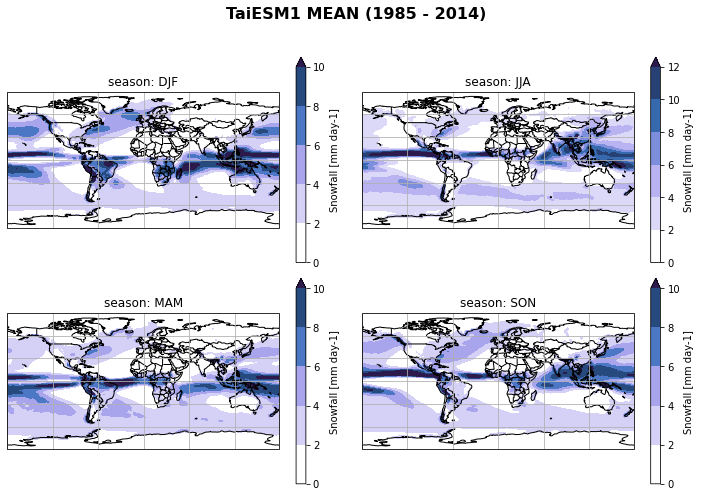

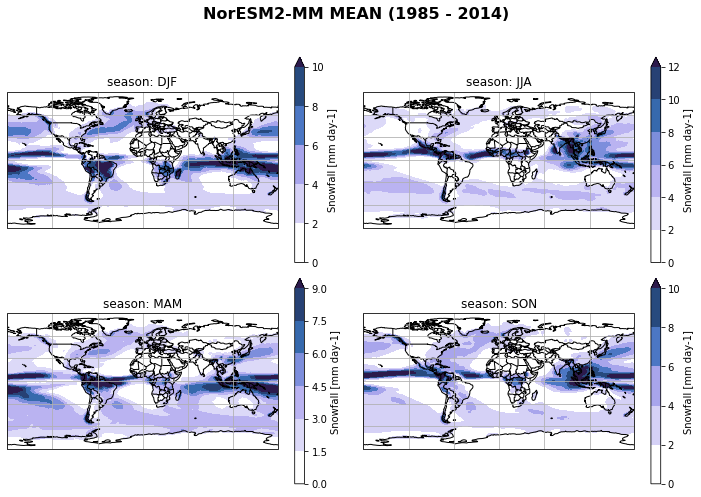

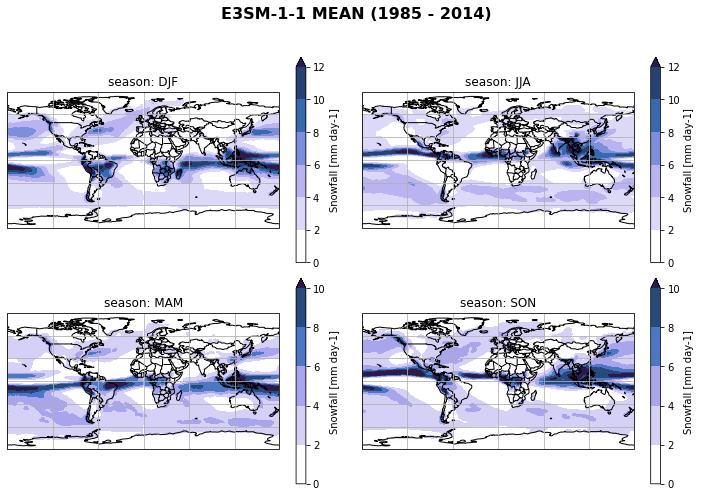

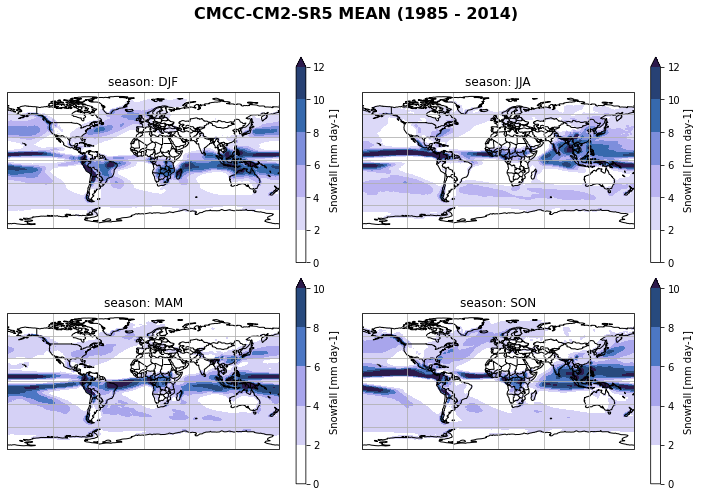

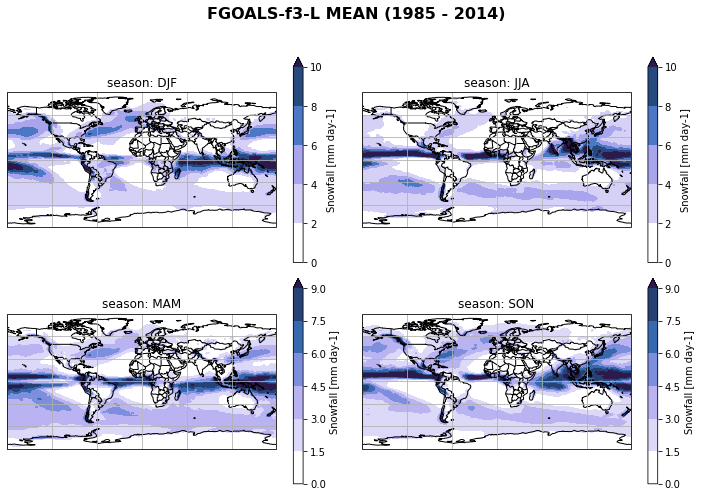

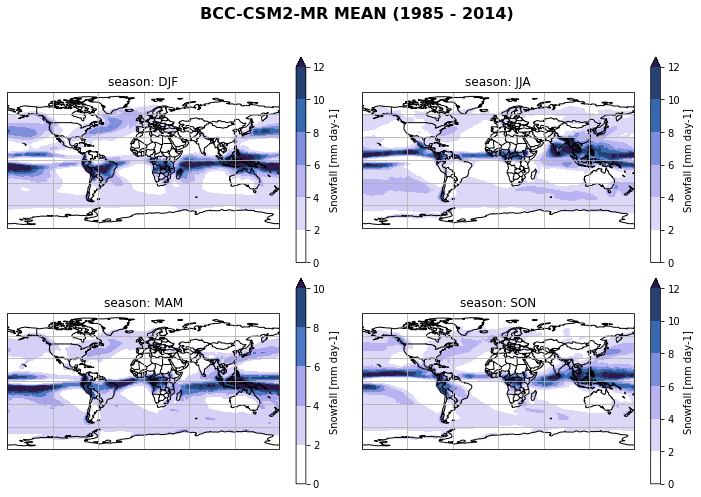

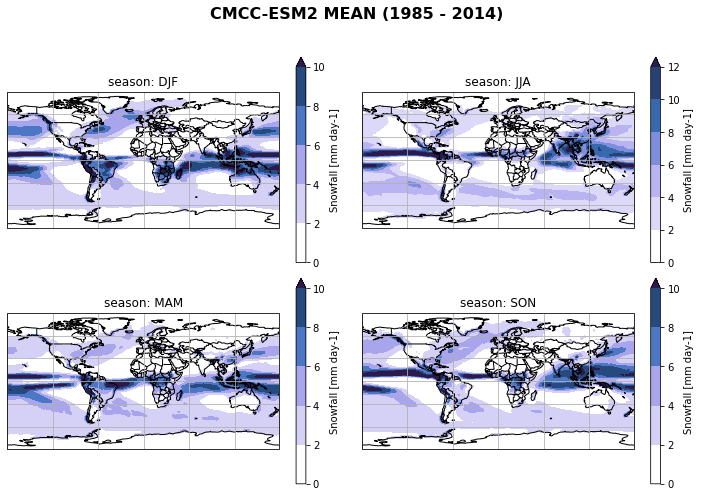

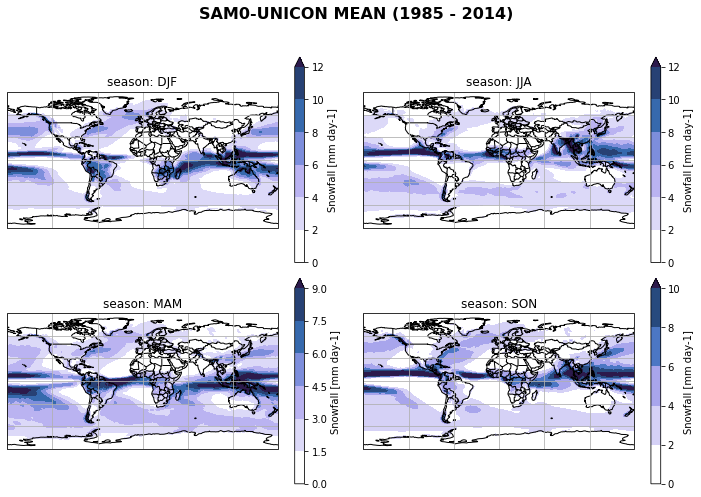

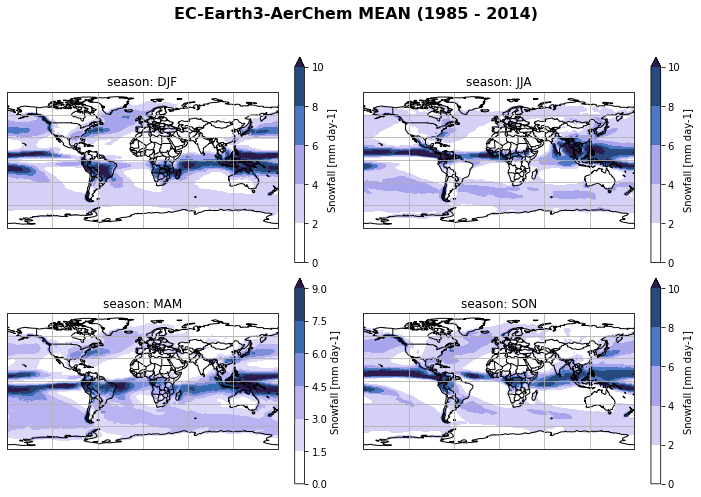

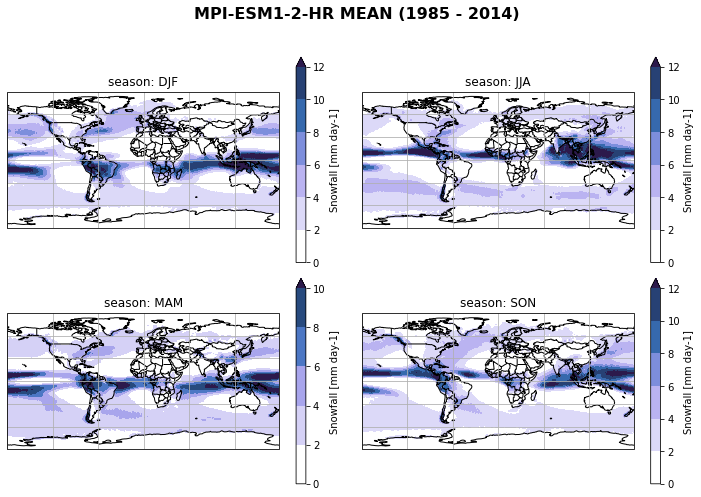

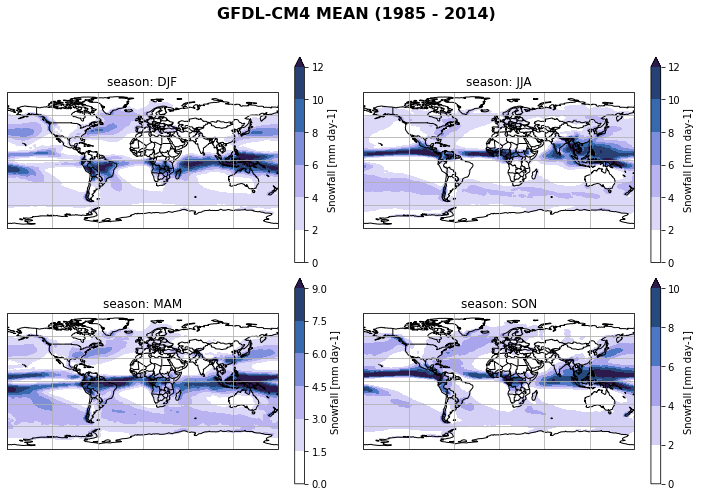

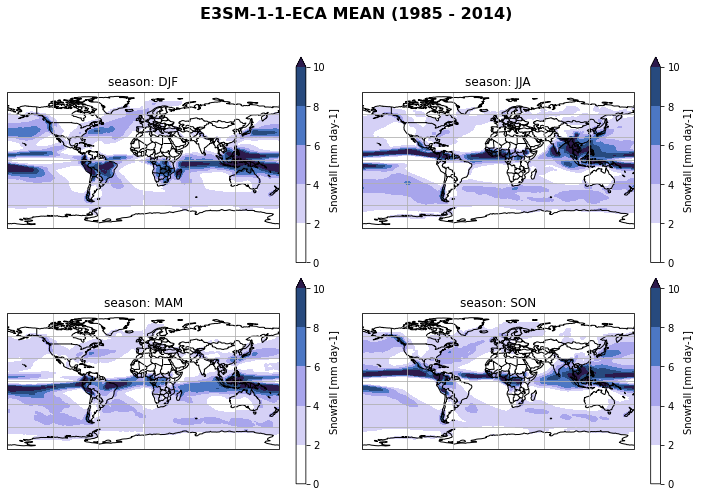

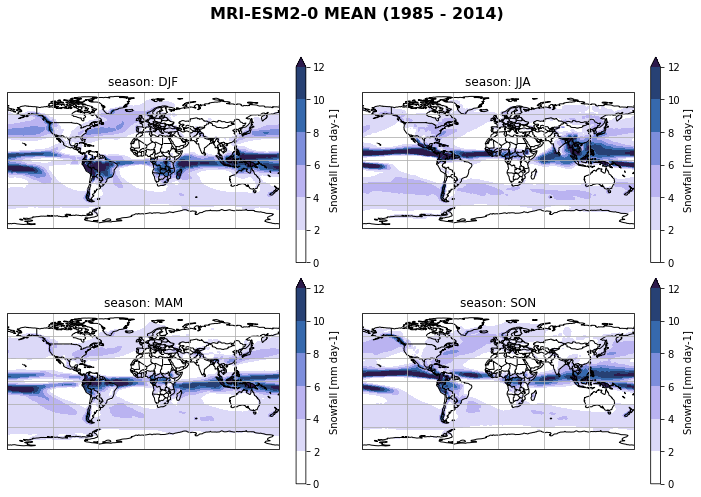

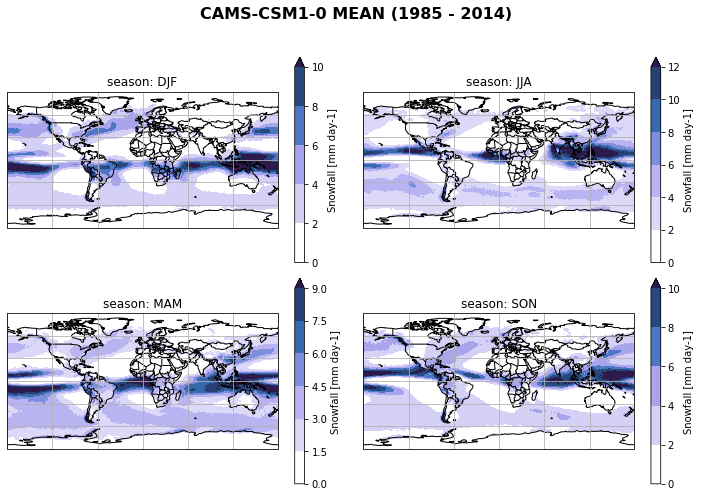

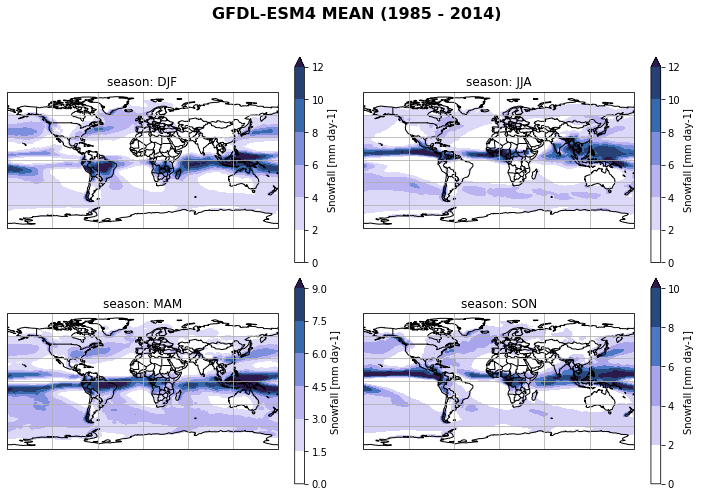

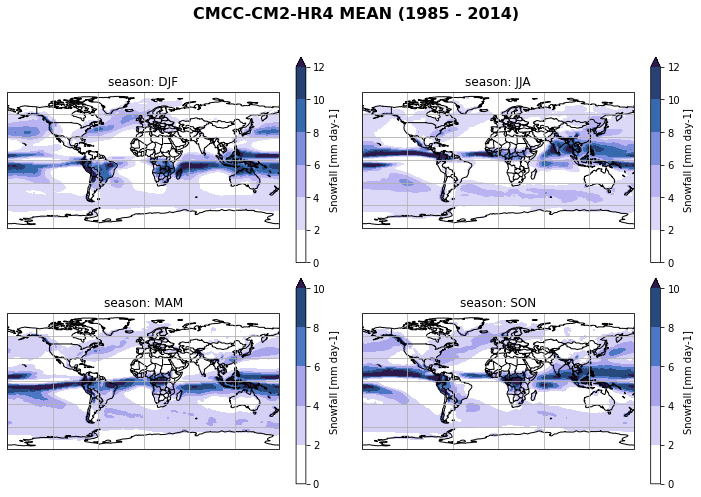

In [21]:
for model in ds_cmip.model.values:
    fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_mean'].sel(model=model), title='{} MEAN ({} - {})'.format(model,starty, endy))

# Create model mean/spread of seasonal mean of all regridded models

In [22]:
ds_cmip[variable_id[0]+'_season_model_mean'] = ds_cmip[variable_id[0]+'_season_mean'].mean('model', keep_attrs=True, skipna = True)
ds_cmip[variable_id[0]+'_season_model_std']  = ds_cmip[variable_id[0]+'_season_mean'].std('model', keep_attrs=True, skipna = True)

In [23]:
if variable_id[0] == 'prsn':
    label='Snowfall (mm$\,$day$^{-1}$)'
    vmin = 0
    vmax = 2.5
    levels = 25
    add_colorbar=False
    vmin_std = vmin
    vmax_std= 0.6
if variable_id[0] == 'pr':
    label='Total precipitation (mm$\,$day$^{-1}$)' 
    vmin = 0
    vmax=9
    levels = 90
    add_colorbar=False
    vmin_std =vmin
    vmax_std = 2.4
elif variable_id[0] == 'clivi':
    label='Ice Water Path (g$\,$m$^{-2}$)'
    vmin = 0
    vmax=100
    levels = 25
    add_colorbar = False
    vmin_std =vmin
    vmax_std = 20
elif variable_id[0] == 'lwp':
    label='Liquid Water Path (g$\,$m$^{-2}$)'
    vmin = 0
    vmax=100
    levels = 25
    add_colorbar = False
    vmin_std =vmin
    vmax_std = 20
elif variable_id[0] == 'tas':
    label='2-m temperature (K)'
    vmin = 246
    vmax=300
    levels = 40
    add_colorbar = False
    vmin_std = 0
    vmax_std=6
    

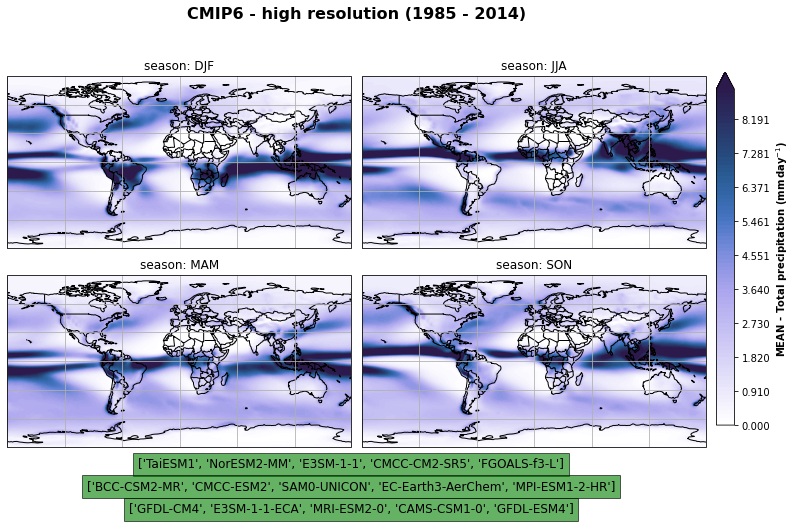

In [24]:
fig, axs, im = fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_model_mean'], vmin, vmax, levels, add_colorbar=False, title='CMIP6 - high resolution (1985 - 2014)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
cb.set_label(label='MEAN - {}'.format(label), weight='bold')

plt.tight_layout()


axs[2].text(1,-0.12, ds_cmip.model.values.tolist()[0:5], size=12, ha="center", 
         transform=axs[2].transAxes, bbox ={'facecolor':'green',
                'alpha':0.6,
                'pad':5})
if len(ds_cmip.model.values.tolist()) > 4:
    axs[2].text(1,-0.25, ds_cmip.model.values.tolist()[5:10], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
if len(ds_cmip.model.values.tolist()) > 10:
    axs[2].text(1,-0.38, ds_cmip.model.values.tolist()[10:-1], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
    

# save figure to png
figdir = '/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/'
figname = '{}_season_mean_1deg_{}_{}.png'.format(variable_id[0], starty, endy)
plt.savefig(figdir + figname, format = 'png', bbox_inches = 'tight', transparent = False)

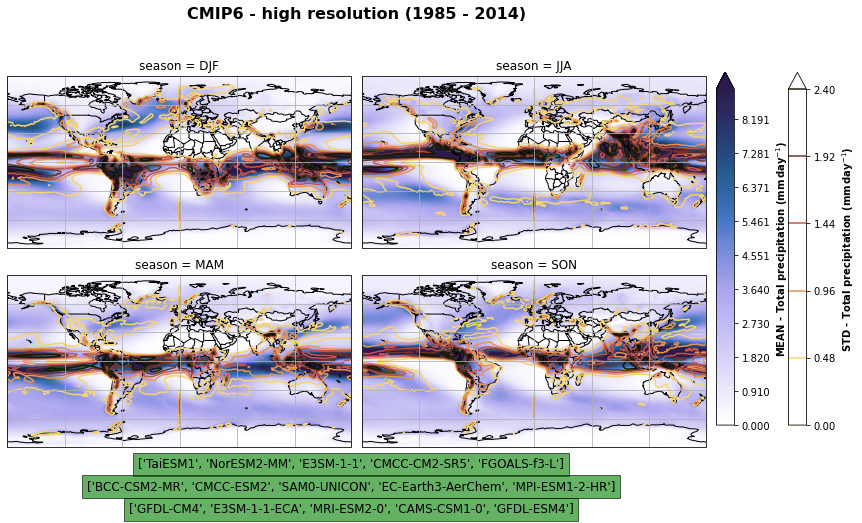

In [25]:
fig, axs, im = fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_model_mean'], vmin, vmax, levels, add_colorbar=False, title='CMIP6 - high resolution (1985 - 2014)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
cb.set_label(label='MEAN - {}'.format(label), weight='bold')



for ax, i in zip(axs, ds_cmip[variable_id[0]+'_season_model_std'].season):
    sm = ds_cmip[variable_id[0]+'_season_model_std'].sel(season=i).plot.contour(ax=ax, transform=ccrs.PlateCarree(), 
                                                                      robust=True,
                                                                      vmin = vmin_std, vmax = vmax_std,
                                                                       levels = 6,
                                                                      cmap=cm.lajolla,
                                                                      add_colorbar=False)
    
cbar_ax = fig.add_axes([1.10, 0.15, 0.025, 0.7])
sb = fig.colorbar(sm, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
sb.set_label(label='STD - {}'.format(label), weight='bold')


plt.tight_layout()


axs[2].text(1,-0.12, ds_cmip.model.values.tolist()[0:5], size=12, ha="center", 
         transform=axs[2].transAxes, bbox ={'facecolor':'green',
                'alpha':0.6,
                'pad':5})
if len(ds_cmip.model.values.tolist()) > 4:
    axs[2].text(1,-0.25, ds_cmip.model.values.tolist()[5:10], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
if len(ds_cmip.model.values.tolist()) > 10:
    axs[2].text(1,-0.38, ds_cmip.model.values.tolist()[10:-1], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
# save figure to png
figdir = '/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/'
figname = '{}_season_mean_std_1deg_{}_{}.png'.format(variable_id[0], starty, endy)
plt.savefig(figdir + figname, format = 'png', bbox_inches = 'tight', transparent = False)

In [26]:
# savet to netcdf
filename = '{}_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/'
nc_out = savepath + filename
files = glob(nc_out)

counter = 0 
# Save to netcdf file
if nc_out in files:
    print('{} is downloaded'.format(nc_out))
    counter += 1
    print('Have saved in total: {:} files'.format(str(counter)))
else:
    ds_cmip.to_netcdf(nc_out)
    print('file written: .{}'.format(nc_out))

file written: ./scratch/franzihe/output/CMIP6_hist/1deg/pr_1deg_198501_201412.nc
